# Tutorial de Big Data
## Bienvenidos a la clase 2

### Temario:

- Introducción a tweepy, textblob, nltk
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones
- Introducción a la Tarea 1 parte 2 

### Respuestas a las preguntas de los videos:

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy tweepy textblob datetime nltk

In [2]:
#importamos los paquetes a utilizar
import os
import re
import string
import pandas as pd
import tweepy
from textblob import TextBlob
from datetime import datetime

import nltk
nltk.download('punkt') #Agregamos punkt a la descarga, por un error en los códigos posteriores que se soluciona con descargarlo
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Crear con Sublime (u otro editor de texto) un archivo llamado `twitter_keys.txt` dentro de la carpeta `clase5` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [3]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [4]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [5]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos
    Input: 
      screen_name (str): el nombre de la persona en twitter
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [6]:
date_before_elections = datetime(2020, 10, 16, 0, 0, 0)
all_tweets_biden = get_all_tweets("JoeBiden", date_before_elections)

Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets
Hasta ahora se han extraido 1000 tweets
Hasta ahora se han extraido 1200 tweets
Hasta ahora se han extraido 1400 tweets


In [7]:
#Veamos la lista con los primeros 5 tweets 
all_tweets_biden[:22] #Belén nos pidió chequear diferentes cantidades en el video. Elegimos un número en especial, el 22. 


[Status(_api=<tweepy.api.API object at 0x000001BB942204C0>, _json={'created_at': 'Tue Aug 24 20:53:55 +0000 2021', 'id': 1430272177744629762, 'id_str': '1430272177744629762', 'full_text': 'To the millions of Americans who have been waiting for full FDA approval—go get your COVID-19 shot now. https://t.co/393WzbJ6om', 'truncated': False, 'display_text_range': [0, 127], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1429921826025660421, 'id_str': '1429921826025660421', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/E9ga6TGXEAM91nV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E9ga6TGXEAM91nV.jpg', 'url': 'https://t.co/393WzbJ6om', 'display_url': 'pic.twitter.com/393WzbJ6om', 'expanded_url': 'https://twitter.com/TheDemocrats/status/1429922727184543745/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 720, 'h': 720, 'res

In [8]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    for tweet in all_tweets:
        one_tweet = [tweet.id_str, tweet.created_at, tweet.full_text, 
                     tweet.retweeted, tweet.favorite_count, 
                     tweet.in_reply_to_screen_name]
        all_tweets_selection.append(one_tweet)
    
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

In [9]:
df_all_tweets = save_tweets_text(all_tweets_biden, "tweets.csv")
df_all_tweets.head(22) #Utilizamos el comando head para ver los primeros veintidos tweets.

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1430272177744629762,2021-08-24 20:53:55,To the millions of Americans who have been wai...,False,7031,None
1,1430162366939942924,2021-08-24 13:37:34,The United States stands by the commitment we’...,False,10866,None
2,1429845800612413441,2021-08-23 16:39:38,"Once screened and cleared, we will welcome Afg...",False,85256,None
3,1429611346346250242,2021-08-23 01:08:00,To those in Henri’s path: Don't forget that yo...,False,37603,None
4,1429504471395078144,2021-08-22 18:03:19,RT @POTUS: Today at 4 PM ET I will address the...,False,0,None
5,1428130239016747016,2021-08-18 23:02:37,RT @POTUS: We will not sit by as Governors try...,False,0,None
6,1428058056672247813,2021-08-18 18:15:47,Human rights must be the center of our foreign...,False,18588,None
7,1428026091386679301,2021-08-18 16:08:46,RT @WhiteHouse: The COVID-19 vaccines are safe...,False,0,None
8,1427712487072227337,2021-08-17 19:22:37,The answer is clear: We cannot continue to rep...,False,28176,None
9,1427677357297516552,2021-08-17 17:03:01,Four presidents have presided over an American...,False,25144,None


In [10]:
# Emoticons contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticons Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [11]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [12]:
#mrhod clean_tweets()
def clean_tweets(tweet):
    '''
    Esta función limpia el texto del tweet. Elimina emoticones, palabras vacías,
    links, indicaciones de retweets, etc. Para dejar en el texto solo las
    palabras con mayor contenido.
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Saco los emoji
    tweet = emoji_pattern.sub(r'', tweet)
    
    #Separo los tweets in tokens
    word_tokens = word_tokenize(tweet)
    #Obtengo set de palabras vacias para luego eliminarlas
    stop_words = set(stopwords.words('english'))
    
    #loop por las condiciones
    filtered_tweet = []
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and \
           w not in string.punctuation:
            filtered_tweet.append(w)

    
    return ' '.join(filtered_tweet)

In [13]:
#Este es un tweet sucio:
df_all_tweets.iloc[3]['text']

"To those in Henri’s path: Don't forget that you may need to seek shelter while we’re still battling COVID-19 and the Delta variant. So wear a mask and try to observe social distancing.\n\nAnd to everyone across the country, don't get caught by the next storm. Get vaccinated now."

In [14]:
#Este es un tweet limpio:
clean_tweets(df_all_tweets.iloc[3]['text'])

"To Henri path Do n't forget may need seek shelter still battling COVID-19 Delta variant So wear mask try observe social distancing And everyone across country n't get caught next storm Get vaccinated"

In [15]:
start_time = datetime.strptime("2020-10-20", '%Y-%m-%d')
end_time = datetime.strptime("2020-11-18", '%Y-%m-%d')

def filter_year_and_month(date, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''
    dd = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
    return dd > start_time and dd < end_time


In [16]:
def generate_sentiment(texto):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        texto (str): texto a limpiar y analizar
    Output:
         polarity (float): en el rango [-1.0, 1.0] 
         subjectivity (float): en el rango [0.0, 1.0] 
    '''
    # Limpiamos el texto del tweet
    filtered_tweet = clean_tweets(texto)
    # Calculamos el sentimiento con el metodo TextBlob
    blob = TextBlob(filtered_tweet)
    Sentiment = blob.sentiment

    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity            

    return polarity, subjectivity
    

In [17]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion filtra los tweets entre las fechas de inicio y fin
    indicadas y agrega dos columnas, una de polarity y otra de subjectivity.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y nuevas columnas
    '''
    df = df[df.apply(lambda row: filter_year_and_month(row['created_at'], 
                                                start_time, end_time), axis=1)]

    df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_sentiment(row['text']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

In [18]:
tweets_sentimiento = add_sentiment(df_all_tweets, start_time, end_time)
tweets_sentimiento

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity
682,1328837822950752259,2020-11-17 23:10:00,"Today, @KamalaHarris and I met with some of ou...",False,116335,None,0.500000,0.700000
683,1328790008963227649,2020-11-17 20:00:00,I’m keeping in my prayers all of our friends a...,False,266940,None,0.266667,0.583333
684,1328734005404061701,2020-11-17 16:17:28,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000
685,1328474177007972354,2020-11-16 23:05:00,Americans want us to cooperate. They want us t...,False,133689,None,0.500000,0.812500
686,1328467885279375361,2020-11-16 22:40:00,"When we build back better, we will do so with ...",False,195969,None,0.250000,0.285714
...,...,...,...,...,...,...,...,...
1192,1318561610235981824,2020-10-20 14:36:00,"The simple, sad truth is that this president i...",False,60008,None,-0.166667,0.452381
1193,1318361290306392064,2020-10-20 01:20:00,Pennsylvania — there are just a few hours left...,False,18245,None,0.000000,0.000000
1194,1318357515680116737,2020-10-20 01:05:00,"For once, Donald Trump is correct: I will list...",False,210312,None,0.000000,0.000000
1195,1318352230458609664,2020-10-20 00:44:00,I will be a president who pushes towards the f...,False,338880,None,-0.125000,0.187500


## Trabajo Practico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el codigo sea facíl de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 23/8 a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- Tambíen deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1qaXCveEw3MjEwXQsu2zpqUz34BiaCMR0WapcsQ7jGs0/edit?usp=sharing
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, yo no corregiré sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de habér entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1: 
Impriman algunos de los tweets más negativos (filtrando por la columna de `polarity`) y su fecha

In [19]:
#Se puede observar que el código nos los permite ver antes de imprimirlos y chequear que estén filtrados correctamente.
tweets_sentimiento.sort_values("polarity")[["text","created_at","polarity"]].head(10) 


,text,created_at,polarity
835,After tonight's horrific terrorist attack in V...,2020-11-03 02:50:00,-0.900000
705,"If you’re sick, if you’re struggling, if you’r...",2020-11-11 00:45:00,-0.714286
1196,.@realDonaldTrump — if you had listened to the...,2020-10-20 00:07:00,-0.700000
1179,Listening to scientists is not a bad thing.\n\...,2020-10-20 22:05:00,-0.700000
697,Today marks five years since the horrific ISIS...,2020-11-13 21:05:00,-0.650000
933,"The hard truth is that under President Trump, ...",2020-11-01 02:04:00,-0.545833
1126,"Kids were ripped from their parents’ arms, and...",2020-10-23 02:29:00,-0.400000
1188,"Yesterday, @realDonaldTrump decided to attack ...",2020-10-20 17:04:16,-0.400000
1133,He’s a confused guy. He doesn’t know who he’s ...,2020-10-23 01:58:50,-0.400000
1186,"Mr. President, the people are tired. They’re t...",2020-10-20 17:04:17,-0.383333


In [20]:
#Retiramos la columna "polarity" porque no corresponde al ejercicio e imprimimos.
print(tweets_sentimiento.sort_values("polarity")[["text","created_at"]].head(10))

                                                   text          created_at
835   After tonight's horrific terrorist attack in V... 2020-11-03 02:50:00
705   If you’re sick, if you’re struggling, if you’r... 2020-11-11 00:45:00
1196  .@realDonaldTrump — if you had listened to the... 2020-10-20 00:07:00
1179  Listening to scientists is not a bad thing.\n\... 2020-10-20 22:05:00
697   Today marks five years since the horrific ISIS... 2020-11-13 21:05:00
933   The hard truth is that under President Trump, ... 2020-11-01 02:04:00
1126  Kids were ripped from their parents’ arms, and... 2020-10-23 02:29:00
1188  Yesterday, @realDonaldTrump decided to attack ... 2020-10-20 17:04:16
1133  He’s a confused guy. He doesn’t know who he’s ... 2020-10-23 01:58:50
1186  Mr. President, the people are tired. They’re t... 2020-10-20 17:04:17


#### Ejercicio 2: 
Impriman algunos de los tweets más positivos (filtrando por la columna de `polarity`) y su fecha

In [21]:
#Realizamos el mismo código del paso anterior, pero ordenando de forma no ascendente
tweets_sentimiento.sort_values("polarity", ascending=False)[["text","created_at","polarity"]].head(10) 

,text,created_at,polarity
1180,America is a nation that values immigrants. It...,2020-10-20 20:46:00,1.0
995,Christen — tell your grandmother I’m incredibl...,2020-10-29 20:45:00,0.9
689,"Once again, I congratulate the brilliant women...",2020-11-16 14:07:25,0.9
776,"Keep the faith, guys. We’re gonna win this.",2020-11-04 05:53:00,0.8
864,1 day. Let’s win this thing.,2020-11-02 15:27:00,0.8
940,Happy Halloween! https://t.co/i2BT7k0xdI,2020-10-31 23:55:00,0.8
894,"Together, we can solve the crises we’re facing...",2020-11-01 22:33:45,0.8
703,"Today, we honor the service of those who have ...",2020-11-11 16:08:11,0.8
787,"Let's win this thing, Pennsylvania! https://t....",2020-11-03 22:04:00,0.8
762,Keep faith in the process and in each other. T...,2020-11-04 23:50:00,0.8


In [22]:
#Se puede observar que nuevamente removimos la columna "polarity" e imprimimos.
print(tweets_sentimiento.sort_values("polarity", ascending=False)[["text","created_at"]].head(10)) 

                                                   text          created_at
1180  America is a nation that values immigrants. It... 2020-10-20 20:46:00
995   Christen — tell your grandmother I’m incredibl... 2020-10-29 20:45:00
689   Once again, I congratulate the brilliant women... 2020-11-16 14:07:25
776         Keep the faith, guys. We’re gonna win this. 2020-11-04 05:53:00
864                        1 day. Let’s win this thing. 2020-11-02 15:27:00
940            Happy Halloween! https://t.co/i2BT7k0xdI 2020-10-31 23:55:00
894   Together, we can solve the crises we’re facing... 2020-11-01 22:33:45
703   Today, we honor the service of those who have ... 2020-11-11 16:08:11
787   Let's win this thing, Pennsylvania! https://t.... 2020-11-03 22:04:00
762   Keep faith in the process and in each other. T... 2020-11-04 23:50:00


#### Ejercicio 3: 
Agreguenle al df llamado `tweets_sentimiento` una nueva columna llamada `positivo` que tenga:
- 1 cuando el tweet tiene polarity > 0, 
- 0 cuando el tweet tiene polarity = 0, 
- 1 cuando el tweet tiene polarity < 0 

In [23]:
#Aquí dudamos si la consigna no quería indicar -1 en caso de polariry<0. Por lo tanto definimos dos columnas, positivo
#y positivo2. Siendo esta última una columna que considera la consigna sin errores de tipeo.

#Definimos una función que nos agregue valores.
def signo(pol):
    if pol> 0:
        return 1
    elif pol < 0:
        return -1
    else:
        return 0
#Aplicamos la función a una nueva columna "positivo"
tweets_sentimiento["positivo"] = tweets_sentimiento['polarity'].apply(lambda pol: signo(pol))
#Definimos una función que nos agregue valores.
def signo2(pol2):
    if pol2> 0:
        return 1
    elif pol2 < 0:
        return 1
    else:
        return 0
#Aplicamos la función a una nueva columna "positivo2"
tweets_sentimiento["positivo2"] = tweets_sentimiento['polarity'].apply(lambda pol2: signo2(pol2))
#Ahora vemos la impresión, de forma reducida.
print(tweets_sentimiento.sort_values("polarity")[["created_at","positivo","positivo2"]])

              created_at  positivo  positivo2
835  2020-11-03 02:50:00        -1          1
705  2020-11-11 00:45:00        -1          1
1196 2020-10-20 00:07:00        -1          1
1179 2020-10-20 22:05:00        -1          1
697  2020-11-13 21:05:00        -1          1
...                  ...       ...        ...
1119 2020-10-23 03:25:24         1          1
703  2020-11-11 16:08:11         1          1
689  2020-11-16 14:07:25         1          1
995  2020-10-29 20:45:00         1          1
1180 2020-10-20 20:46:00         1          1

[515 rows x 3 columns]


<ipython-input-23-e7607975b945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento["positivo"] = tweets_sentimiento['polarity'].apply(lambda pol: signo(pol))
<ipython-input-23-e7607975b945>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento["positivo2"] = tweets_sentimiento['polarity'].apply(lambda pol2: signo2(pol2))


#### Ejercicio 4: 
Agrupen los tweets por día y promedien el la polaridad. Luego hagan un gráfico con el sentimiento por día.

In [24]:
#Establecemos como variable de tiempo a "created_at"
tweets_sentimiento["created_at"]= pd.to_datetime(tweets_sentimiento["created_at"])
#Utilizamos el módulo importado para crear una variable "Fecha" solo con el día de emisión del tweet (sin horario).
tweets_sentimiento["Fecha"]=tweets_sentimiento["created_at"].dt.date
#Chequeamos
tweets_sentimiento[["Fecha","created_at"]]

<ipython-input-24-e0457d9523e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento["created_at"]= pd.to_datetime(tweets_sentimiento["created_at"])
<ipython-input-24-e0457d9523e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento["Fecha"]=tweets_sentimiento["created_at"].dt.date


,Fecha,created_at
682,2020-11-17,2020-11-17 23:10:00
683,2020-11-17,2020-11-17 20:00:00
684,2020-11-17,2020-11-17 16:17:28
685,2020-11-16,2020-11-16 23:05:00
686,2020-11-16,2020-11-16 22:40:00
...,...,...
1192,2020-10-20,2020-10-20 14:36:00
1193,2020-10-20,2020-10-20 01:20:00
1194,2020-10-20,2020-10-20 01:05:00
1195,2020-10-20,2020-10-20 00:44:00


In [47]:
# Hacemos el groupby y el mean guardándolo en un nuevo df
mean_pol = tweets_sentimiento.groupby("Fecha")["polarity"].mean().reset_index()
mean_pol

,Fecha,polarity
0,2020-10-20,-0.006932
1,2020-10-21,0.122063
2,2020-10-22,0.132929
3,2020-10-23,0.122758
4,2020-10-24,0.035287
5,2020-10-25,0.081356
6,2020-10-26,0.118350
7,2020-10-27,0.058696
8,2020-10-28,0.077308
9,2020-10-29,0.120751


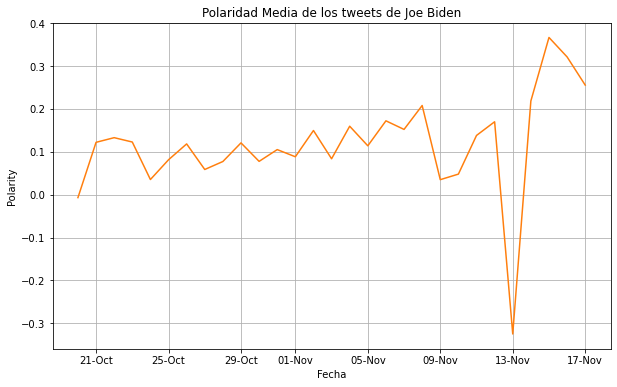

In [48]:
#Importamos numpy y matplotlib
from matplotlib.dates import DateFormatter 
import matplotlib.pyplot as plt
import numpy as np

# Ploteamos los datos

fig, ax = plt.subplots(figsize=(10, 6))

#Damos formato al gráfico
ax.plot(mean_pol.Fecha, mean_pol.polarity, color='tab:orange', label='Media de la polaridad')
ax.xaxis.set_major_formatter(DateFormatter('%d-%b'))
ax.set_xlabel("Fecha")
ax.set_ylabel("Polarity")
ax.set_title("Polaridad Media de los tweets de Joe Biden")
ax.grid(True)



#### Repaso del análisis de sentimiento: 
Por último, los invito a que exploren el análisis de sentimiento de forma teórica y práctica:
- Revisen la documentación de `TextBlob` y del método `sentiment` https://textblob.readthedocs.io/en/dev/ 
- Prueben en la practica el resultado que arroja para determinadas frases (les dejo unos ejemplos, pero pueden probar los que quieran)


In [51]:
blob = TextBlob('good')
blob.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [50]:
blob = TextBlob('bad')
blob.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [52]:
blob = TextBlob('Hate the quarentine')
blob.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
blob = TextBlob('Love my life')
blob.sentiment

In [53]:
blob = TextBlob('Make America Great Again')
blob.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [54]:
blob = TextBlob('Black Lives Matter')
blob.sentiment

Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)